In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing
from sklearn import metrics

In [2]:
#create a list of class names 
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
              'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [4]:
fashion = tf.keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashion.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
print("Training data:",train_images.shape, train_labels.shape)
print("Testing data:",test_images.shape, test_labels.shape)

Training data: (60000, 28, 28) (60000,)
Testing data: (10000, 28, 28) (10000,)


The shape of the training data means that there are 6k images and each image is 28 x 28 pixels. The other tuple means each image has an associated label.

In [6]:
#a function to display an image from the data
def show_training_image(index):
    img_label = str(train_labels[index]) + ' (' +  class_names[train_labels[index]] + ')'
    plt.figure()
    plt.title('Image Label ' + img_label) 
    plt.imshow(train_images[index], cmap='gray')  # data is grayscale, but displays in color without cmap='gray'
    plt.colorbar()
    plt.show()
  

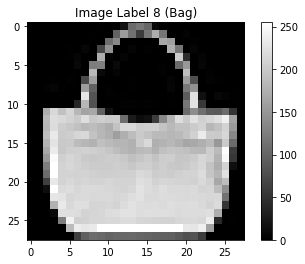

In [7]:
show_training_image(100)

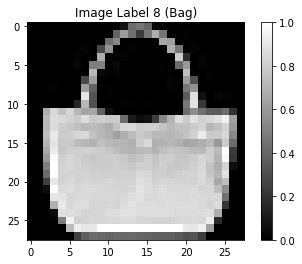

In [8]:
#normalize the values of the image scale to a usable scale for the model ie 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

show_training_image(100)

# Create the model

In [11]:
#define a your model as sequential and assign each layer a unique name
model = tf.keras.models.Sequential()
#Flattens each pixel array[28,28] to a single vector array [784]
model.add(tf.keras.layers.Flatten(input_shape=(28,28),name='flatten')) #First layer is flatten.
#each of the 128 neurons is connected to the 784 output pixels by the Flatten layer
#the rule of thumb for choosing the number of neurons:
#     input size >= # neurons >= size of output
model.add(tf.keras.layers.Dense(128,activation='relu',name='dense-128-relu')) #Dense layer

#add another layer to determine the probability that an image is in each of the classes
#a dense layer with 10 neurons, for each of the classes of clothing
#softmax activation function calculates the probability the 
model.add(tf.keras.layers.Dense(10,activation='softmax',name='dense-10-softmax'))

In [12]:
print('Input Shape:',train_images.shape)
print()
print(model.summary())

Input Shape: (60000, 28, 28)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense-128-relu (Dense)       (None, 128)               100480    
_________________________________________________________________
dense-10-softmax (Dense)     (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
#before training, specify how the model will learn from the data.
#thus we specify the optimizer, how to measure loss and metrics

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
train_hist = model.fit(train_images,train_labels, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 10s 161us/sample - loss: 0.4999 - accuracy: 0.8262
Epoch 2/40
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3754 - accuracy: 0.8653
Epoch 3/40
60000/60000 [==============================] - ETA: 0s - loss: 0.3336 - accuracy: 0.87 - 5s 80us/sample - loss: 0.3334 - accuracy: 0.8784
Epoch 4/40
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3092 - accuracy: 0.8873
Epoch 5/40
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2916 - accuracy: 0.8926
Epoch 6/40
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2771 - accuracy: 0.8989
Epoch 7/40
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2662 - accuracy: 0.9018
Epoch 8/40
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2547 - accuracy: 0.9059
Epoch 9/40
60000/60000 [==============================] - 4s 75us/sample - l

In [15]:
def plot_acc(hist):
  # plot the accuracy
  plt.title('Accuracy History')
  plt.plot(hist.history['accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()
  
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

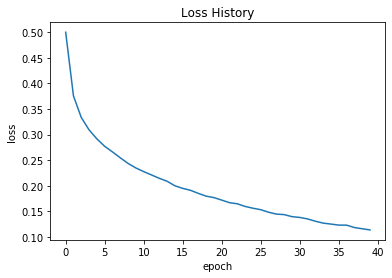

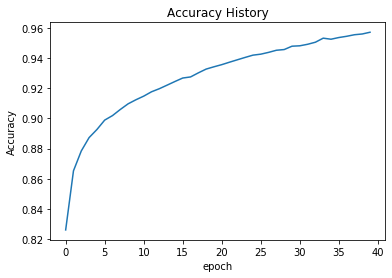

In [16]:
plot_loss(train_hist)
plot_acc(train_hist)

# Evaluate the trained model

In [17]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=0)
print('max training accuracy:',max(train_hist.history['accuracy']),' test accuracy:', test_acc)

max training accuracy: 0.9569833  test accuracy: 0.8888


From the results above we can see that the model has overfit(memorized training data) since it doesn't do as well on test data which it hasn't seen before

In [18]:
%reload_ext tensorboard

In [19]:
#remove previous logs
!rm -rf ./logs/

In [21]:
#redefine a your model as sequential and assign each layer a unique name
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28),name='flatten')) #First layer is flatten.
model.add(tf.keras.layers.Dense(128,activation='relu',name='dense-128-relu')) #Dense layer
model.add(tf.keras.layers.Dense(10,activation='softmax',name='dense-10-softmax'))

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
import datetime
log_dir = '/logs/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

train_hist = model.fit(train_images,train_labels, epochs=40,
                      validation_data=(test_images, test_labels), #after each epoch, evaluation is done on how well its performing
                      callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples


NotFoundError: Failed to create a directory: /logs/20200429-124413\train; No such file or directory [Op:CreateSummaryFileWriter]